In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Sentiment-Analysis-BLING/diabetes-health-indicators-dataset.zip

Archive:  /content/drive/MyDrive/Sentiment-Analysis-BLING/diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate
pd.set_option('display.max_columns', None)
import time


import warnings
warnings.filterwarnings('ignore')

## Data Understanding & Exploration

In [ ]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [ ]:
filename = 'diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(filename)

In [ ]:
# lets check the information of dataset
explore_dataset(df,filename)

			EDA Dataset: diabetes_binary_health_indicators_BRFSS2015.csv
Total Rows: 253680

Total Columns: 22

Columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Total Null Values: 0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
 

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Data Cleaning & Analysis

In [ ]:
# lets try to check the desctiption of dataset
'''
The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 

'''

desc = df.describe().T
print(tabulate(desc, headers = 'keys', tablefmt = 'psql'))

+----------------------+---------+------------+----------+-------+-------+-------+-------+-------+
|                      |   count |       mean |      std |   min |   25% |   50% |   75% |   max |
|----------------------+---------+------------+----------+-------+-------+-------+-------+-------|
| Diabetes_binary      |  253680 |  0.139333  | 0.346294 |     0 |     0 |     0 |     0 |     1 |
| HighBP               |  253680 |  0.429001  | 0.494934 |     0 |     0 |     0 |     1 |     1 |
| HighChol             |  253680 |  0.424121  | 0.49421  |     0 |     0 |     0 |     1 |     1 |
| CholCheck            |  253680 |  0.96267   | 0.189571 |     0 |     1 |     1 |     1 |     1 |
| BMI                  |  253680 | 28.3824    | 6.60869  |    12 |    24 |    27 |    31 |    98 |
| Smoker               |  253680 |  0.443169  | 0.496761 |     0 |     0 |     0 |     1 |     1 |
| Stroke               |  253680 |  0.0405708 | 0.197294 |     0 |     0 |     0 |     0 |     1 |
| HeartDis

> Just by looking at this table we can extract some important information of our data, for example if we take a look at the target column Diabetes_binary we can see the max value is 1 and the minimum value is 0  while the mean of this column tends to 0, which lets us know there are more "false diabetes patient" than actual patients. 

> Additionally, we can clearly see this data needs some scaling since the difference between values is noticeable.

> Also from the above, we can see that BMI feature max value is 98 and HeartDiseaseorAttack is 1. So, we need to scale these features as well.

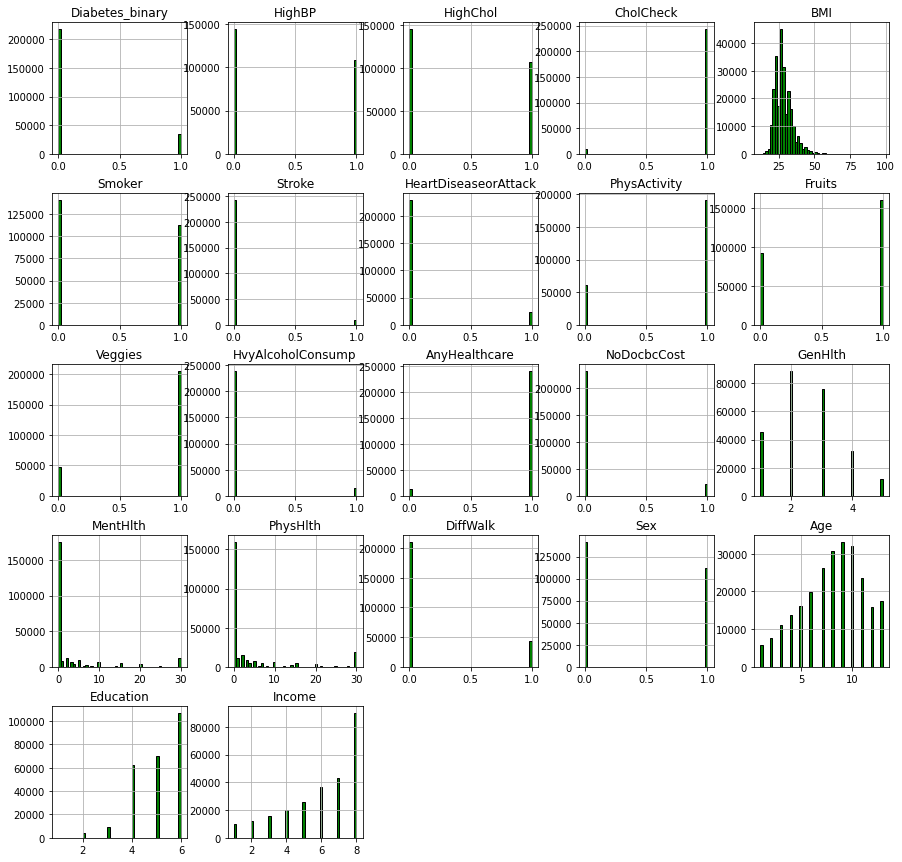

In [ ]:
# Overall idea about distribution of data histogram 
def plot_histogram(data):
    data.select_dtypes(include=[int, float]).hist(bins=50, figsize=(15,15), color = "g", edgecolor='black')
    plt.show()
    
plot_histogram(df)

> From above analysis, we can see the histogram of each feature in which BMI feature are normally distributed and some features are binary or multi label.

In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    df_final[col].value_counts().plot(kind = 'bar', color = ['green', 'red'])

    plt.xlabel('Score Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)


    plt.subplot(1,2,2)

    df_final[col].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green', 'red'],
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.show()

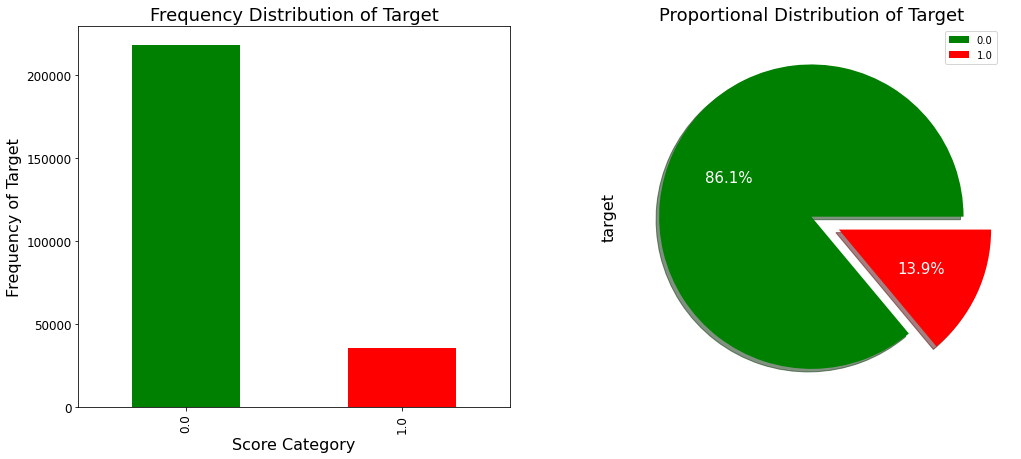

In [ ]:
target_distribution(df, 'Diabetes_binary')

> From the distribution of each target we see that 0 is dominent as compare to 1. `86%` are not a diabetes patients and just `14%` are diabetes patients.

> Clearly, we can see that our dataset is imbalanced. Therefore, accuracy evaluation is not good when dataset is in imbalanced form as accuracy is influenced by the majority class.

> We will check the different performance metrics Precison, Recall, F1-score, Auc score on testing data and see how models perform according these performance metrics.

> For imbalanced data, ROC/AUC works better in evaluating the model performance.

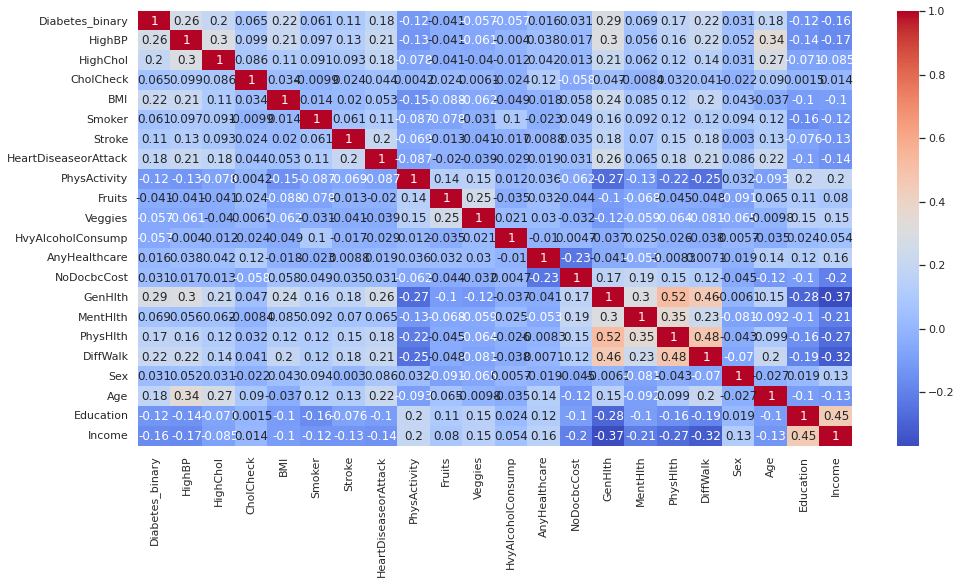

+----+----------------------+-------------------------+
|    | feature              |   CorrelationWithTarget |
|----+----------------------+-------------------------|
|  0 | GenHlth              |               0.293569  |
|  1 | HighBP               |               0.263129  |
|  2 | DiffWalk             |               0.218344  |
|  3 | BMI                  |               0.216843  |
|  4 | HighChol             |               0.200276  |
|  5 | Age                  |               0.177442  |
|  6 | HeartDiseaseorAttack |               0.177282  |
|  7 | PhysHlth             |               0.171337  |
|  8 | Stroke               |               0.105816  |
|  9 | MentHlth             |               0.0693151 |
| 10 | CholCheck            |               0.0647608 |
| 11 | Smoker               |               0.0607885 |
| 12 | NoDocbcCost          |               0.0314328 |
| 13 | Sex                  |               0.03143   |
| 14 | AnyHealthcare        |               0.01

In [ ]:
# lets try to check the correlation of each feature with target
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

PCC = df.corr()['Diabetes_binary'].values
dic = {
    'feature' : df.corr()['Diabetes_binary'].index,
    'CorrelationWithTarget' : PCC
}
pcc_df = pd.DataFrame(dic).sort_values(by = 'CorrelationWithTarget',ascending=False)[1:].reset_index()
pcc_df = pcc_df.drop('index', axis=1)
print(tabulate(pcc_df, headers = 'keys', tablefmt = 'psql'))

> From the above table and graph, we can see from the correlation matrix is that the GenHlth and HighBP features correlate positively with our target variable whilst the other features Income and Education correlate negatively; this is going to help when training our model since the separation between classes becomes more clear.

> A positive correlation means that the variables move in the same direction. In other words, it means that as one variable increases so does the other, and conversely, when one variable decreases so does the other. A negative correlation means that the variables move in opposite directions to each other.

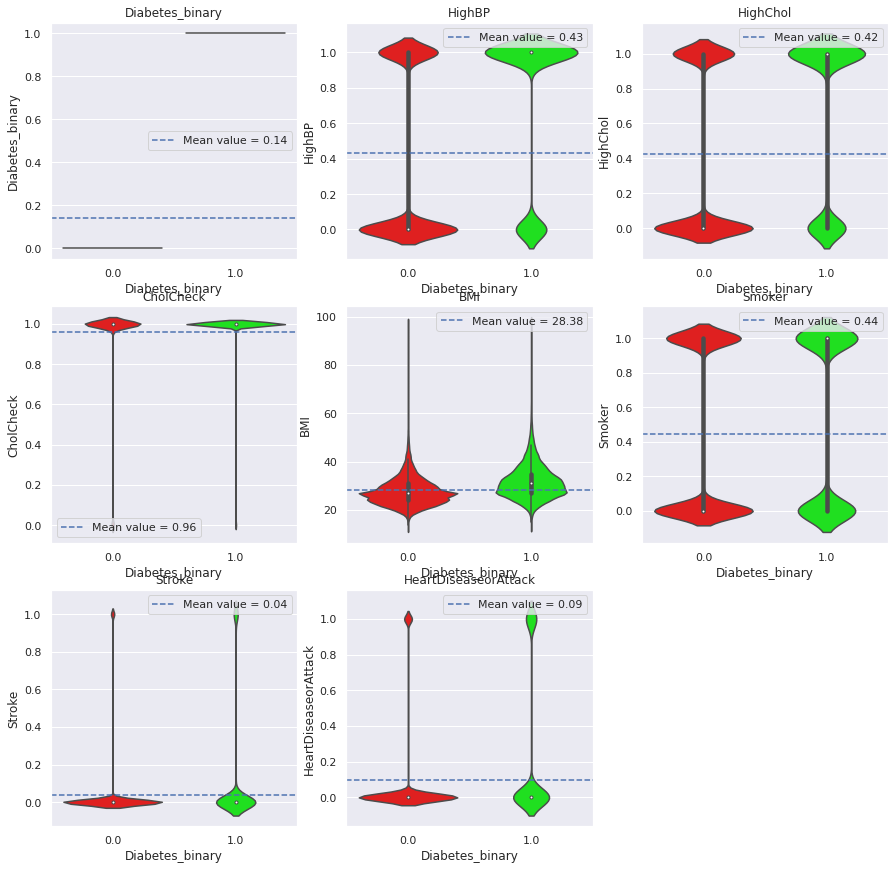

In [ ]:
#violinlpot of all features
features = df.iloc[:,0:8]
plt.figure(figsize=(15,20))
j = 0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=df["Diabetes_binary"],y=df[i],palette=["red","lime"])
    plt.title(i)
    plt.axhline(df[i].mean(),linestyle = "dashed", label ="Mean value = " + str(round(df[i].mean(), 2)))
    plt.legend(loc="best")
    j = j + 1

> **BMI** - From the correlation matrix we observed the higher the values the more likely a patient has diabetes - this can be observed clearly in the violin plots. Additionally, by looking at the mean we could say that if a BMI value is above the mean value, the patient probably has diabetes.

> Other distributions of features can be observed above.

In [ ]:
''' 
lets try to check the percentage of missing values,unique values,percentage of one catagory values 
and type against each column.

'''
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+----------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature              |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+----------------------+-----------------+-------------------+------------------------------+---------|
|  0 | Diabetes_binary      |               2 |                 0 |                     86.0667  | float64 |
|  1 | HighBP               |               2 |                 0 |                     57.0999  | float64 |
| 20 | Education            |               6 |                 0 |                     42.3072  | float64 |
| 19 | Age                  |              13 |                 0 |                     13.1047  | float64 |
| 18 | Sex                  |               2 |                 0 |                     55.9658  | float64 |
| 17 | DiffWalk             |               2 |                 0 |                     83.1776  | float64 |
| 16 | PhysHlth    

In [ ]:
def check_categorical_numeric_binary_multiclass_columns(data):
    """
    In check_categorical_numeric_binary_multiclass_columns function we are doing all the things that given below:
    - checking the categorical features except binary multiclass label
    - checking numeric columns
    - checking binary multiclass columns that value counts exist between (2 to 10) 
    """
    cat_cols_without_binary_multiclass = []
    num_cols = []
    binary_multiclass_cols = []

    for i in data.columns:
        if data[i].dtypes =='object' and (not(data[i].nunique() >=2 and data[i].nunique()<=10)):
            cat_cols_without_binary_multiclass.append(i)        
        else:
            if data[i].nunique() >=2 and data[i].nunique()<=10:
                binary_multiclass_cols.append(i)
            else:
                num_cols.append(i) 

    print("Length of without binary multiclass catagorical columns: ",len(cat_cols_without_binary_multiclass))
    print(cat_cols_without_binary_multiclass)
    print(" ")
    print("Length of binary multiclass columns: ",len(binary_multiclass_cols))  
    print(binary_multiclass_cols)
    print(" ")
    
    print("Length of numeric columns: ",len(num_cols))    
    print(num_cols)
    print(" ")
    
    return cat_cols_without_binary_multiclass,binary_multiclass_cols,num_cols

Length of without binary multiclass catagorical columns:  0
[]
 
Length of binary multiclass columns:  18
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']
 
Length of numeric columns:  4
['BMI', 'MentHlth', 'PhysHlth', 'Age']
 
+-----------------------+------------------+
|                       |   DataTypesCount |
|-----------------------+------------------|
| categorical_features  |                0 |
| numerical_features    |                4 |
| binary/mutli_features |               18 |
+-----------------------+------------------+


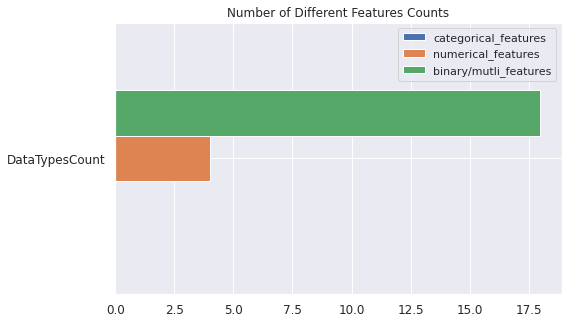

In [ ]:
# lets get the categroical, binary_multiclass and numeric columns
cat_cols, binary_multiclass_cols, numeric_cols = check_categorical_numeric_binary_multiclass_columns(df)
categories_list = []
categories_list.append(len(cat_cols))
categories_list.append(len(numeric_cols))
categories_list.append(len(binary_multiclass_cols))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary/mutli_features"], 
                             columns=['DataTypesCount'])
print(tabulate(categories_df, headers = 'keys', tablefmt = 'psql'))

categories_df = categories_df.transpose().plot(kind="barh", figsize=(8, 5), title="Number of Different Features Counts", fontsize=12)

In [ ]:
def pie_chart_distribution(data, cols):
    """
    In pie_chart_distribution function we are plotting the PIE chart of all categroical
    features.
    """
    plt.rcParams['font.size'] = 13
    for col in cols:
        print("="*50)
        print(f"\t Feature: {col}")
        print("="*50)
        final = (round(data[col].value_counts(normalize=True),3)*100).to_frame()
        print(tabulate(final, headers = 'keys', tablefmt = 'psql'))
        
        plt.figure(figsize=(7,8))
        data[col].value_counts().plot(kind='pie', autopct='%1.0f%%').legend()
        plt.legend(bbox_to_anchor=(1,0.9))
        plt.show()

	 Feature: Diabetes_binary
+----+-------------------+
|    |   Diabetes_binary |
|----+-------------------|
|  0 |              86.1 |
|  1 |              13.9 |
+----+-------------------+


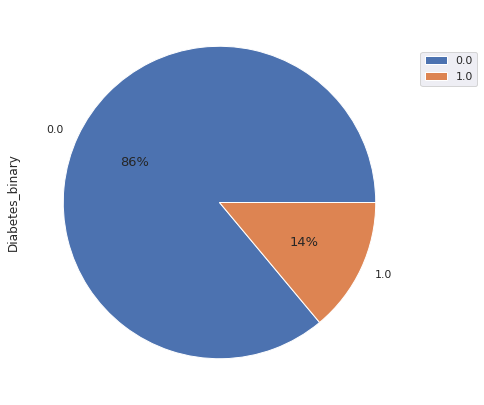

	 Feature: HighBP
+----+----------+
|    |   HighBP |
|----+----------|
|  0 |     57.1 |
|  1 |     42.9 |
+----+----------+


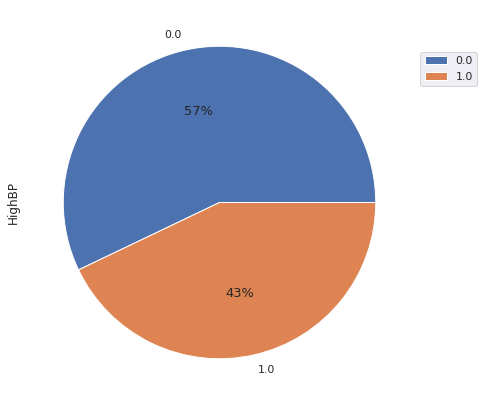

	 Feature: HighChol
+----+------------+
|    |   HighChol |
|----+------------|
|  0 |       57.6 |
|  1 |       42.4 |
+----+------------+


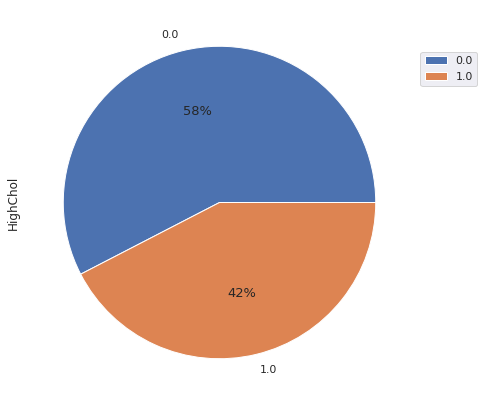

	 Feature: CholCheck
+----+-------------+
|    |   CholCheck |
|----+-------------|
|  1 |        96.3 |
|  0 |         3.7 |
+----+-------------+


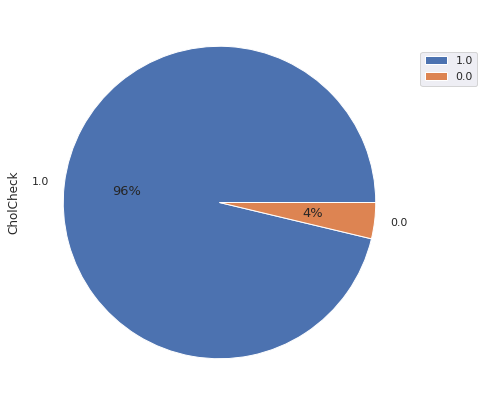

	 Feature: Smoker
+----+----------+
|    |   Smoker |
|----+----------|
|  0 |     55.7 |
|  1 |     44.3 |
+----+----------+


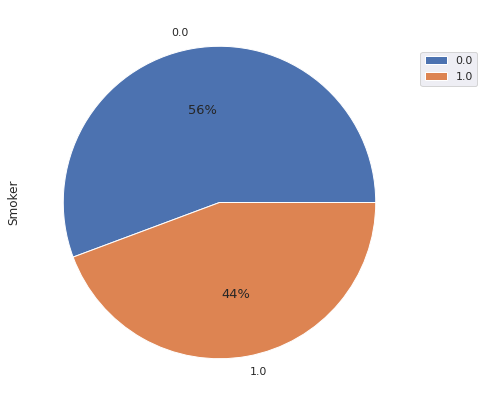

	 Feature: Stroke
+----+----------+
|    |   Stroke |
|----+----------|
|  0 |     95.9 |
|  1 |      4.1 |
+----+----------+


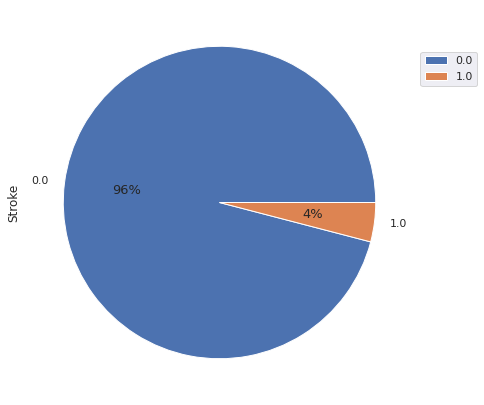

	 Feature: HeartDiseaseorAttack
+----+------------------------+
|    |   HeartDiseaseorAttack |
|----+------------------------|
|  0 |                   90.6 |
|  1 |                    9.4 |
+----+------------------------+


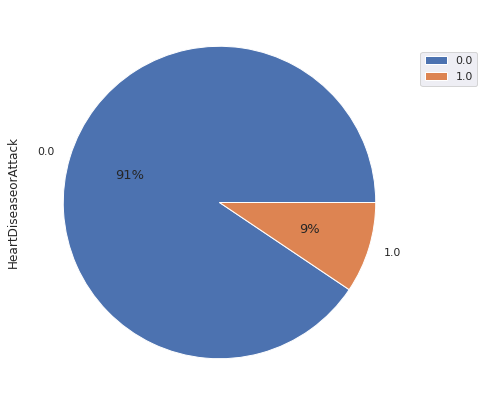

	 Feature: PhysActivity
+----+----------------+
|    |   PhysActivity |
|----+----------------|
|  1 |           75.7 |
|  0 |           24.3 |
+----+----------------+


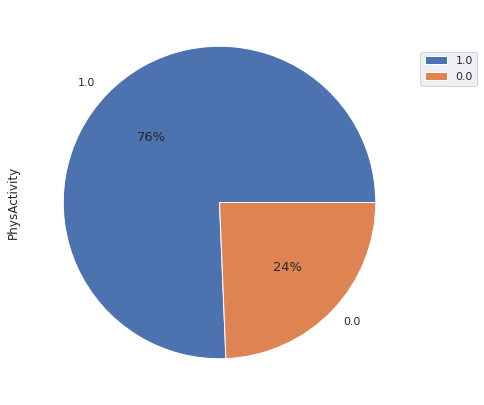

	 Feature: Fruits
+----+----------+
|    |   Fruits |
|----+----------|
|  1 |     63.4 |
|  0 |     36.6 |
+----+----------+


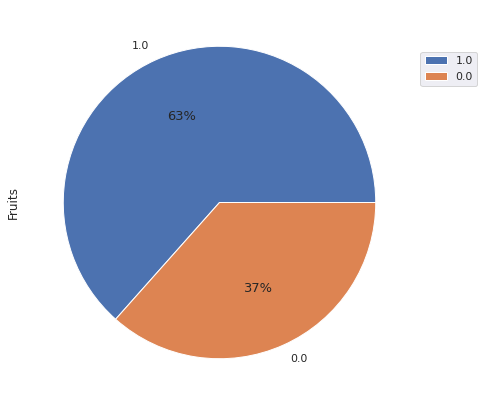

	 Feature: Veggies
+----+-----------+
|    |   Veggies |
|----+-----------|
|  1 |      81.1 |
|  0 |      18.9 |
+----+-----------+


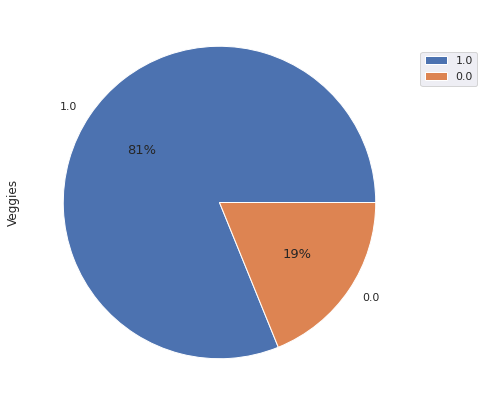

	 Feature: HvyAlcoholConsump
+----+---------------------+
|    |   HvyAlcoholConsump |
|----+---------------------|
|  0 |                94.4 |
|  1 |                 5.6 |
+----+---------------------+


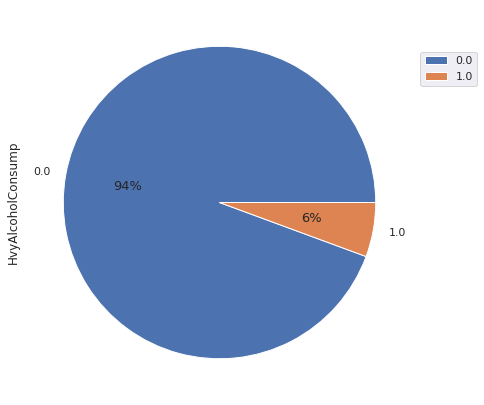

	 Feature: AnyHealthcare
+----+-----------------+
|    |   AnyHealthcare |
|----+-----------------|
|  1 |            95.1 |
|  0 |             4.9 |
+----+-----------------+


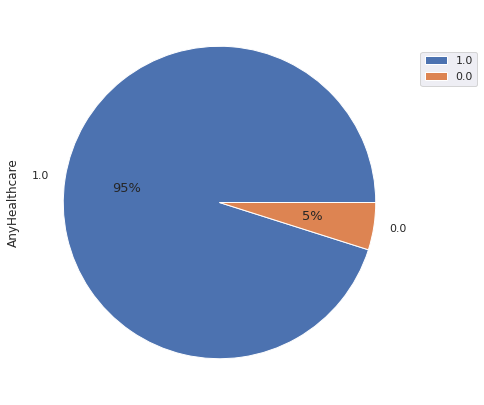

	 Feature: NoDocbcCost
+----+---------------+
|    |   NoDocbcCost |
|----+---------------|
|  0 |          91.6 |
|  1 |           8.4 |
+----+---------------+


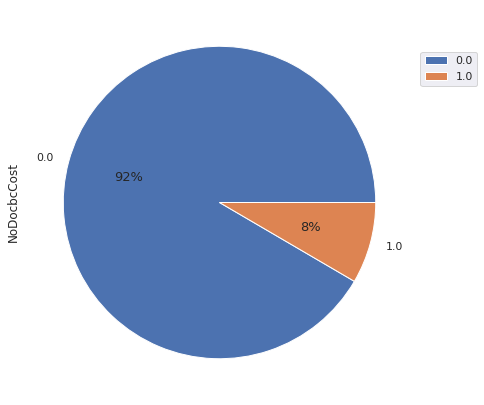

	 Feature: GenHlth
+----+-----------+
|    |   GenHlth |
|----+-----------|
|  2 |      35.1 |
|  3 |      29.8 |
|  1 |      17.9 |
|  4 |      12.4 |
|  5 |       4.8 |
+----+-----------+


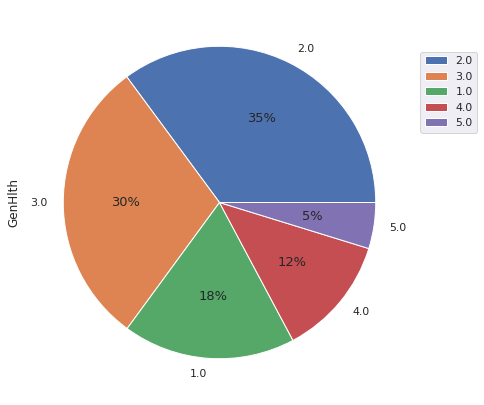

	 Feature: DiffWalk
+----+------------+
|    |   DiffWalk |
|----+------------|
|  0 |       83.2 |
|  1 |       16.8 |
+----+------------+


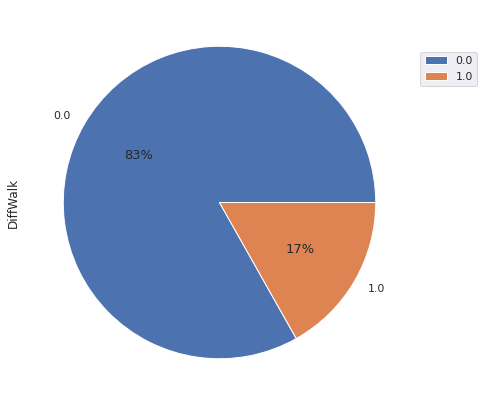

	 Feature: Sex
+----+-------+
|    |   Sex |
|----+-------|
|  0 |    56 |
|  1 |    44 |
+----+-------+


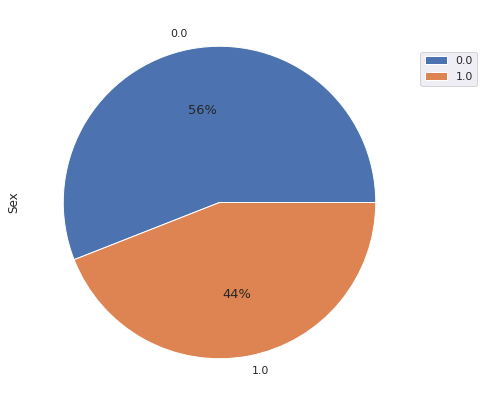

	 Feature: Education
+----+-------------+
|    |   Education |
|----+-------------|
|  6 |        42.3 |
|  5 |        27.6 |
|  4 |        24.7 |
|  3 |         3.7 |
|  2 |         1.6 |
|  1 |         0.1 |
+----+-------------+


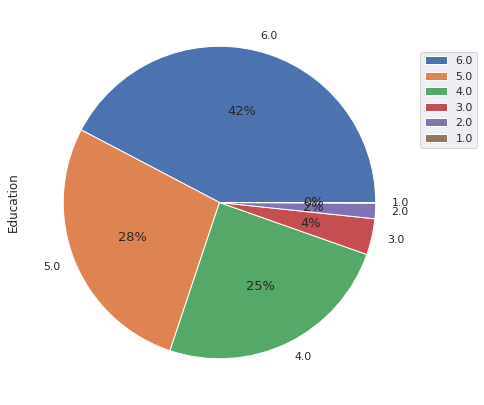

	 Feature: Income
+----+----------+
|    |   Income |
|----+----------|
|  8 |     35.6 |
|  7 |     17   |
|  6 |     14.4 |
|  5 |     10.2 |
|  4 |      7.9 |
|  3 |      6.3 |
|  2 |      4.6 |
|  1 |      3.9 |
+----+----------+


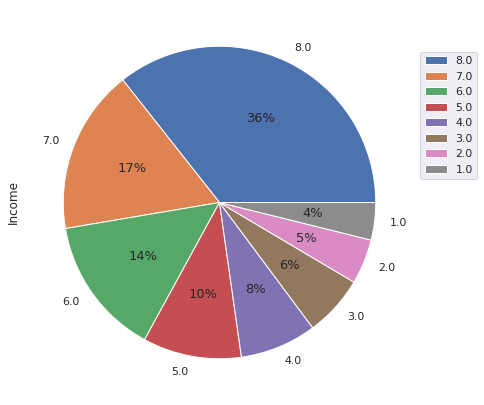

In [ ]:
pie_chart_distribution(df, binary_multiclass_cols)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

## Models Building

In [ ]:
# lets get the independent features and dependent feature
X = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']

In [ ]:
# independent features
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# dependent feature
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [ ]:
# Feature scaling marks the end of the data preprocessing in Machine Learning.
# It is a method to standardize the independent variables of a dataset within a specific range.
# In other words, feature scaling limits the range of variables so that you can compare them on common grounds.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()  
X = std.fit_transform(X) 

In [ ]:
from sklearn.model_selection import train_test_split

# lets split the dataset stratified
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)


# lets try to check the shape of training and testing
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)
print("validation shape :", X_val.shape)

training shape : (101472, 21)
testing shape : (76104, 21)
validation shape : (76104, 21)


In [ ]:
import time

# Import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model, predictions,X_test, y_test_set):
    # Kfold cross validation
    kfold = KFold(n_splits=10)    
    
    y_score = model.predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test_set, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    print ("Accuracy on validation set: {:.4f}".format(accuracy_score(predictions, y_test_set)))
    print ("ROC_AUC on validation set: {:.4f}".format(roc_auc))
    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.set(font_scale=1)
    cm = confusion_matrix(y_test_set, predictions)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions),
              recall_score(y_test_set, predictions),f1_score(y_test_set, predictions),roc_auc]
    return results

In [ ]:
def model_training(model_object, X, y):
    print("Training ...")
    # start time for model training
    start_time = time.time()
    model = model_object
    %time model.fit(X, y)
    # end time for model traning
    training_time = time.time() - start_time
    print("training time: ", training_time)
    print(" done.")
    return model, training_time

In [ ]:
def model_predicting(model_objet, X):
    print("Predicting ...")
    # model predicting start time
    s = time.time()
    y_pred = model_objet.predict(X)
    # model prediction end time
    p = time.time() - s
    print("predicted time: ",p)
    print('done')
    print()
    return y_pred, p

### DecisionTreeClassifier

Training ...
CPU times: user 167 ms, sys: 5.29 ms, total: 172 ms
Wall time: 165 ms
training time:  0.16596436500549316
 done.
Predicting ...
predicted time:  0.008373737335205078
done

Accuracy on validation set: 0.8653
ROC_AUC on validation set: 0.8037

Classification report : 
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     65500
         1.0       0.58      0.12      0.20     10604

    accuracy                           0.87     76104
   macro avg       0.73      0.55      0.56     76104
weighted avg       0.83      0.87      0.83     76104


Confusion Matrix : 
 [[64575   925]
 [ 9324  1280]]


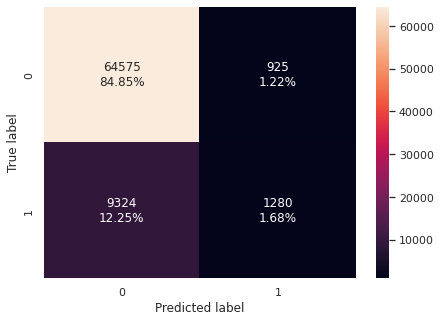

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=5 ,
                             min_samples_split=10,
                             min_samples_leaf=22,)
model_dt, dt_time = model_training(dt, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_dt,dt_pred_time = model_predicting(model_dt,X_test)

# lets evaluate the model
results_dt = modelEvaluation(model_dt, y_pred_dt,X_test, y_test)

### LogisticRegression

Training ...
CPU times: user 1.51 s, sys: 8.51 s, total: 10 s
Wall time: 270 ms
training time:  0.2705051898956299
 done.
Predicting ...
predicted time:  0.005683422088623047
done

Accuracy on validation set: 0.8635
ROC_AUC on validation set: 0.8207

Classification report : 
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65500
         1.0       0.54      0.15      0.23     10604

    accuracy                           0.86     76104
   macro avg       0.71      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104


Confusion Matrix : 
 [[64124  1376]
 [ 9014  1590]]


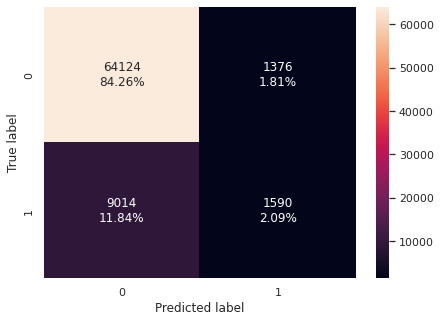

In [ ]:
lr = LogisticRegression()
model_lr, lr_time = model_training(lr, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_lr,lr_pred_time = model_predicting(model_lr,X_test)

# lets evaluate the model
results_lr = modelEvaluation(model_lr, y_pred_lr,X_test, y_test)

### GaussianNB

Training ...
CPU times: user 36.8 ms, sys: 13.6 ms, total: 50.4 ms
Wall time: 48.8 ms
training time:  0.049372196197509766
 done.
Predicting ...
predicted time:  0.025458097457885742
done

Accuracy on validation set: 0.7735
ROC_AUC on validation set: 0.7828

Classification report : 
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     65500
         1.0       0.32      0.57      0.41     10604

    accuracy                           0.77     76104
   macro avg       0.62      0.69      0.64     76104
weighted avg       0.84      0.77      0.80     76104


Confusion Matrix : 
 [[52786 12714]
 [ 4527  6077]]


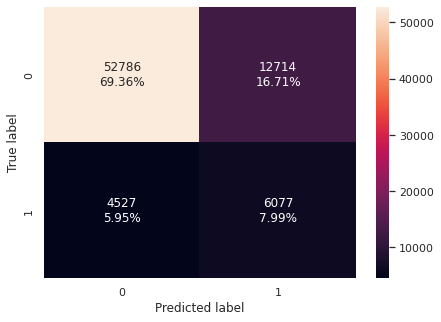

In [ ]:
nb = GaussianNB()
model_nb, nb_time = model_training(nb, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_nb,nb_pred_time = model_predicting(model_nb,X_test)

# lets evaluate the model
results_nb = modelEvaluation(model_nb, y_pred_nb,X_test, y_test)

In [ ]:
results_dt = results_dt + [dt_time, dt_pred_time]
results_lr = results_lr + [lr_time, lr_pred_time]
results_nb = results_nb + [nb_time, nb_pred_time]

In [ ]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','AUC_ROC','trainingTime(s)', 'predTime(s)'],
    'DecisionTree' : results_dt,
    'LogisticRegression' : results_lr,
    'NavieBayes' : results_nb,

    

}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+--------------------+------------+-------------+----------+------------+-----------+-------------------+---------------+
|                    |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   trainingTime(s) |   predTime(s) |
|--------------------+------------+-------------+----------+------------+-----------+-------------------+---------------|
| DecisionTree       |   0.865329 |    0.580499 | 0.120709 |   0.199859 |  0.803681 |         0.165964  |    0.00837374 |
| LogisticRegression |   0.863476 |    0.536076 | 0.149943 |   0.23434  |  0.820724 |         0.270505  |    0.00568342 |
| NavieBayes         |   0.773455 |    0.323399 | 0.573086 |   0.413472 |  0.782793 |         0.0493722 |    0.0254581  |
+--------------------+------------+-------------+----------+------------+-----------+-------------------+---------------+


> From above analysis, we can see that the logistic regression giving better scores as compare to others models.

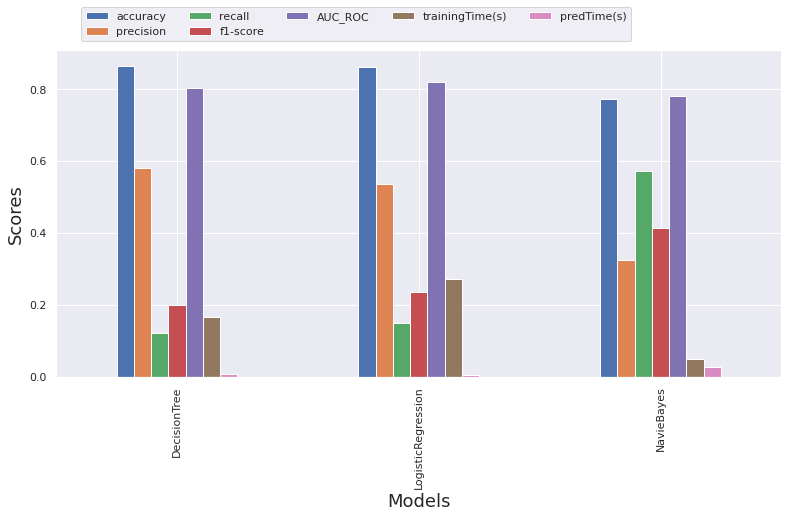

In [ ]:
metrics_df.T.plot(kind='bar', figsize=(13,6))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=5, bbox_to_anchor=(0.8,1.15))
plt.show()

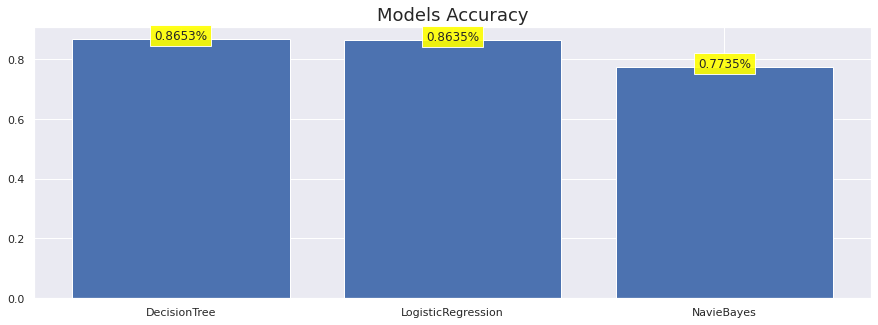

In [ ]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

## Feature selection Wrapper Method :: backward elimination

In [ ]:
X_train = pd.DataFrame(X_train, columns=df.columns[1:])
X_test = pd.DataFrame(X_test, columns=df.columns[1:])

In [ ]:
# sklearn library contains built-in implementation for most of the wrapper methods based feature selection techniques. 
# SequentialFeatureSelector() function comes with various combinations of feature selection techniques.
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
def get_feature_backward_elimination(model, n_features_to_select = 5):
    # Sequential backward selection (sbs)
    sfs_backward = SFS(
        model, n_features_to_select=n_features_to_select, direction="backward"
    )
    sfs_backward.fit(X_train, y_train)
    feature_names = np.array(df.columns[1:].tolist())
    selected_features = feature_names[sfs_backward.get_support()]
    print(
        "Features selected by backward sequential selection: \n"
        f"{selected_features}"
    )
    return selected_features

In [ ]:
def get_X_train_X_test_with_selected_features(selected_features):
    X_train_wrapper = X_train[selected_features]
    X_test_wrapper = X_test[selected_features]
    return X_train_wrapper, X_test_wrapper

In [ ]:
def evalute_model(model, model_name, X_train, X_test, y_train, y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''
    
    # train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    endT = time.time()-start_time

    # AUC
    y_score = model.predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)

    # predict
    start_time1 = time.time()
    y_pred_test = model.predict(X_test)
    endP = time.time()-start_time
    
    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name
    result['Feature'] = len(X_test.columns.tolist())
    
    result['Accuracy'] = accuracy_score(y_test, y_pred_test)
    result['Precision'] = precision_score(y_test, y_pred_test)
    result['Recall'] = recall_score(y_test, y_pred_test)
    result['F1'] = f1_score(y_test, y_pred_test)
    result['Auc_Roc'] = roc_auc
    result['trainingTime'] = endT
    result['predTime'] = endP

    print(model_name, "\t\t\tdone.")
    
    return result

In [ ]:
models = [('DT',DecisionTreeClassifier(criterion='gini',
                            max_depth=5 ,
                             min_samples_split=10,
                             min_samples_leaf=22)),('LR',LogisticRegression()),
          ('NB', GaussianNB())]

In [ ]:
models[0][1]

DecisionTreeClassifier(max_depth=5, min_samples_leaf=22, min_samples_split=10)

In [ ]:
results = []
for i in range(5,18):
  selected_features_dt = get_feature_backward_elimination(models[0][1], n_features_to_select=i)
  X_train_, X_test_ = get_X_train_X_test_with_selected_features(selected_features_dt)
  results.append(evalute_model( models[0][1], 'DT', X_train_, X_test_, y_train, y_test))
  results.append(evalute_model(models[1][1], 'LR', X_train_, X_test_, y_train, y_test))
  results.append(evalute_model(models[2][1], 'NB', X_train_, X_test_, y_train, y_test))

Features selected by backward sequential selection: 
['HighBP' 'HighChol' 'BMI' 'HvyAlcoholConsump' 'GenHlth']
DT 			done.
LR 			done.
NB 			done.
Features selected by backward sequential selection: 
['HighBP' 'HighChol' 'BMI' 'HvyAlcoholConsump' 'GenHlth' 'Income']
DT 			done.
LR 			done.
NB 			done.
Features selected by backward sequential selection: 
['HighBP' 'HighChol' 'BMI' 'HvyAlcoholConsump' 'GenHlth' 'Education'
 'Income']
DT 			done.
LR 			done.
NB 			done.
Features selected by backward sequential selection: 
['HighBP' 'HighChol' 'BMI' 'HvyAlcoholConsump' 'GenHlth' 'Age' 'Education'
 'Income']
DT 			done.
LR 			done.
NB 			done.
Features selected by backward sequential selection: 
['HighBP' 'HighChol' 'BMI' 'HvyAlcoholConsump' 'GenHlth' 'Sex' 'Age'
 'Education' 'Income']
DT 			done.
LR 			done.
NB 			done.
Features selected by backward sequential selection: 
['HighBP' 'HighChol' 'BMI' 'HvyAlcoholConsump' 'GenHlth' 'DiffWalk' 'Sex'
 'Age' 'Education' 'Income']
DT 			done.
LR 	

In [ ]:
models_res_be = pd.DataFrame(results)
models_res_be

,Model_name,Feature,Accuracy,Precision,Recall,F1,Auc_Roc,trainingTime,predTime
0,DT,5,0.865329,0.580499,0.120709,0.199859,0.799402,0.049056,0.076475
1,LR,5,0.863516,0.541843,0.132497,0.212927,0.803744,0.160684,0.194850
2,NB,5,0.831257,0.403518,0.441343,0.421584,0.790062,0.027817,0.075254
3,DT,6,0.865329,0.580499,0.120709,0.199859,0.799315,0.062673,0.090634
4,LR,6,0.864199,0.551082,0.136835,0.219234,0.805469,0.149862,0.182005
5,NB,6,0.824043,0.390319,0.467654,0.425501,0.791013,0.027557,0.076519
6,DT,7,0.865329,0.580499,0.120709,0.199859,0.799315,0.072060,0.099943
7,LR,7,0.864002,0.548289,0.135986,0.217924,0.805795,0.165817,0.200051
8,NB,7,0.819339,0.381473,0.477273,0.424029,0.788960,0.030056,0.082872
9,DT,8,0.865329,0.580499,0.120709,0.199859,0.803815,0.088292,0.116894


In [ ]:
dt1 = models_res_be[models_res_be['Model_name']=='DT']
LR1 = models_res_be[models_res_be['Model_name']=='LR']
NB1 = models_res_be[models_res_be['Model_name']=='NB']

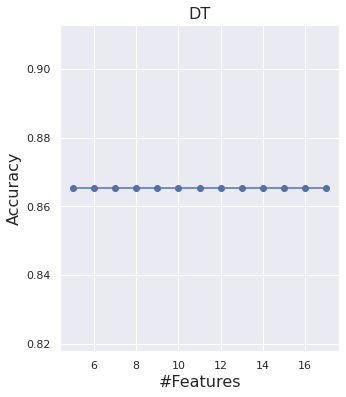

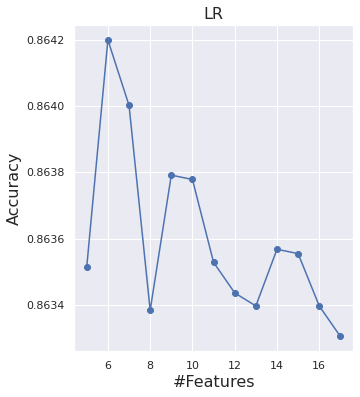

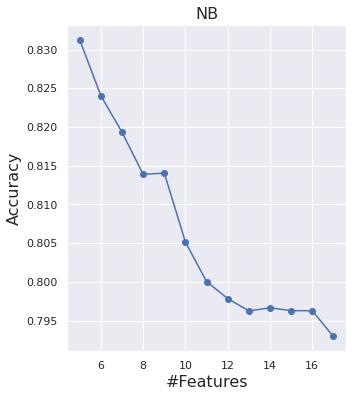

In [ ]:
plt.figure(figsize=(5,6))
plt.plot(dt1['Feature'], dt1['Accuracy'], marker='o')
plt.title("DT",  fontsize=16)
plt.xlabel("#Features",  fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

plt.figure(figsize=(5,6))
plt.plot(LR1['Feature'], LR1['Accuracy'], marker='o')
plt.title("LR",  fontsize=16)
plt.xlabel("#Features",  fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

plt.figure(figsize=(5,6))
plt.plot(NB1['Feature'], NB1['Accuracy'], marker='o')
plt.title("NB",  fontsize=16)
plt.xlabel("#Features",  fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()


In [ ]:
models_res_be.sort_values(by=['Accuracy','Feature'], ascending=[False,True])

,Model_name,Feature,Accuracy,Precision,Recall,F1,Auc_Roc,trainingTime,predTime
0,DT,5,0.865329,0.580499,0.120709,0.199859,0.799402,0.049056,0.076475
3,DT,6,0.865329,0.580499,0.120709,0.199859,0.799315,0.062673,0.090634
6,DT,7,0.865329,0.580499,0.120709,0.199859,0.799315,0.072060,0.099943
9,DT,8,0.865329,0.580499,0.120709,0.199859,0.803815,0.088292,0.116894
12,DT,9,0.865329,0.580499,0.120709,0.199859,0.803815,0.096352,0.124955
15,DT,10,0.865329,0.580499,0.120709,0.199859,0.803815,0.101358,0.129091
18,DT,11,0.865329,0.580499,0.120709,0.199859,0.803815,0.110976,0.139580
21,DT,12,0.865329,0.580499,0.120709,0.199859,0.803815,0.122915,0.151457
24,DT,13,0.865329,0.580499,0.120709,0.199859,0.803815,0.126400,0.156400
27,DT,14,0.865329,0.580499,0.120709,0.199859,0.803815,0.134858,0.165379


## Feature selection Regularized Trees :: Random Forest

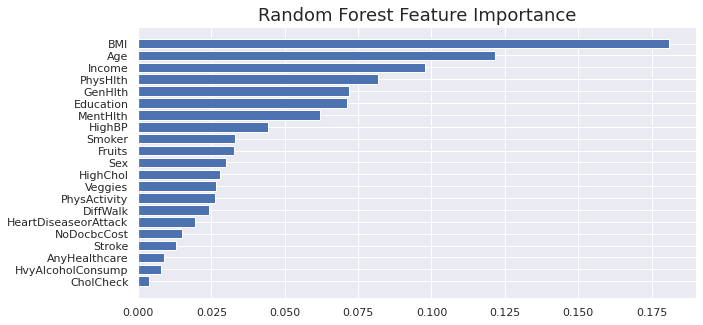

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance", fontsize=18)
plt.show()

In [ ]:
total_features = len(X_train.columns[sorted_idx][::-1])
total_features

21

In [ ]:
def select_how_many_features(k=5):
  selected_features_rf = (X_train.columns[sorted_idx][::-1])[:k].tolist()
  return selected_features_rf

In [ ]:
results = []
for i in range(5,total_features+1):
  selected_features_rf = select_how_many_features(i)
  X_train_ = X_train[selected_features_rf]
  X_test_ = X_test[selected_features_rf]
  results.append(evalute_model(DecisionTreeClassifier(criterion='gini',
                            max_depth=5 ,
                             min_samples_split=10,
                             min_samples_leaf=22,), 'DT', X_train_, X_test_, y_train, y_test))
  results.append(evalute_model(LogisticRegression(), 'LR', X_train_, X_test_, y_train, y_test))
  results.append(evalute_model(GaussianNB(), 'NB', X_train_, X_test_, y_train, y_test))


DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.
DT 			done.
LR 			done.
NB 			done.


In [ ]:
models_res = pd.DataFrame(results)
models_res

,Model_name,Feature,Accuracy,Precision,Recall,F1,Auc_Roc,trainingTime,predTime
0,DT,5,0.862228,0.528841,0.102886,0.172259,0.793689,0.075207,0.103459
1,LR,5,0.860940,0.504955,0.100905,0.168199,0.797751,0.175546,0.210801
2,NB,5,0.821626,0.346871,0.317333,0.331445,0.780937,0.027224,0.079023
3,DT,6,0.862228,0.528841,0.102886,0.172259,0.793529,0.084180,0.111167
4,LR,6,0.860691,0.500469,0.100622,0.167557,0.797923,0.161154,0.195654
5,NB,6,0.818157,0.345850,0.342229,0.344030,0.778041,0.027564,0.078734
6,DT,7,0.862228,0.528841,0.102886,0.172259,0.793529,0.094325,0.123340
7,LR,7,0.860756,0.501633,0.101377,0.168667,0.797936,0.185118,0.220682
8,NB,7,0.812034,0.333093,0.348265,0.340510,0.771324,0.029916,0.084585
9,DT,8,0.863266,0.578571,0.068748,0.122893,0.801928,0.101604,0.129144


In [ ]:
dt = models_res[models_res['Model_name']=='DT']
LR = models_res[models_res['Model_name']=='LR']
NB = models_res[models_res['Model_name']=='NB']

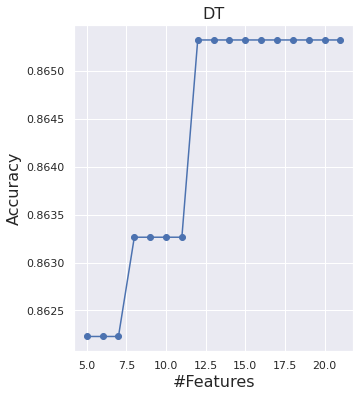

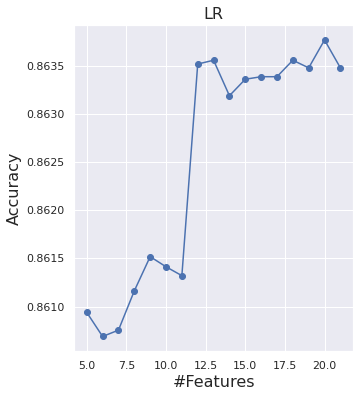

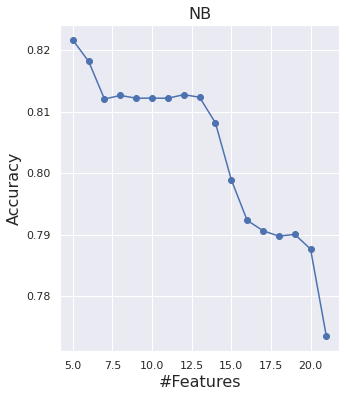

In [ ]:
plt.figure(figsize=(5,6))
plt.plot(dt['Feature'], dt['Accuracy'], marker='o')
plt.title("DT",  fontsize=16)
plt.xlabel("#Features",  fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

plt.figure(figsize=(5,6))
plt.plot(LR['Feature'], LR['Accuracy'], marker='o')
plt.title("LR",  fontsize=16)
plt.xlabel("#Features",  fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

plt.figure(figsize=(5,6))
plt.plot(NB['Feature'], NB['Accuracy'], marker='o')
plt.title("NB",  fontsize=16)
plt.xlabel("#Features",  fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

In [ ]:
models_res.sort_values(by=['Accuracy','Feature'], ascending=[False,True])

,Model_name,Feature,Accuracy,Precision,Recall,F1,Auc_Roc,trainingTime,predTime
21,DT,12,0.865329,0.580499,0.120709,0.199859,0.803815,0.128514,0.157254
24,DT,13,0.865329,0.580499,0.120709,0.199859,0.803815,0.135452,0.164599
27,DT,14,0.865329,0.580499,0.120709,0.199859,0.803815,0.138985,0.168287
30,DT,15,0.865329,0.580499,0.120709,0.199859,0.803815,0.143837,0.173237
33,DT,16,0.865329,0.580499,0.120709,0.199859,0.803681,0.146874,0.177276
36,DT,17,0.865329,0.580499,0.120709,0.199859,0.803681,0.152960,0.182647
39,DT,18,0.865329,0.580499,0.120709,0.199859,0.803681,0.160336,0.191728
42,DT,19,0.865329,0.580499,0.120709,0.199859,0.803681,0.168968,0.200132
45,DT,20,0.865329,0.580499,0.120709,0.199859,0.803681,0.164981,0.196584
48,DT,21,0.865329,0.580499,0.120709,0.199859,0.803681,0.162329,0.192381


# **Model Accuracy On Different Scenario**

In [ ]:
metrics_df.T

Metrics,accuracy,precision,recall,f1-score,AUC_ROC,trainingTime(s),predTime(s)
DecisionTree,0.865329,0.580499,0.120709,0.199859,0.803681,0.165964,0.008374
LogisticRegression,0.863476,0.536076,0.149943,0.234340,0.820724,0.270505,0.005683
NavieBayes,0.773455,0.323399,0.573086,0.413472,0.782793,0.049372,0.025458


In [ ]:
models_res_be.sort_values(by=['Accuracy','Feature'], ascending=[False,True]).head()

,Model_name,Feature,Accuracy,Precision,Recall,F1,Auc_Roc,trainingTime,predTime
0,DT,5,0.865329,0.580499,0.120709,0.199859,0.799402,0.049056,0.076475
3,DT,6,0.865329,0.580499,0.120709,0.199859,0.799315,0.062673,0.090634
6,DT,7,0.865329,0.580499,0.120709,0.199859,0.799315,0.072060,0.099943
9,DT,8,0.865329,0.580499,0.120709,0.199859,0.803815,0.088292,0.116894
12,DT,9,0.865329,0.580499,0.120709,0.199859,0.803815,0.096352,0.124955


In [ ]:
models_res.sort_values(by=['Accuracy','Feature'], ascending=[False,True]).head()

,Model_name,Feature,Accuracy,Precision,Recall,F1,Auc_Roc,trainingTime,predTime
21,DT,12,0.865329,0.580499,0.120709,0.199859,0.803815,0.128514,0.157254
24,DT,13,0.865329,0.580499,0.120709,0.199859,0.803815,0.135452,0.164599
27,DT,14,0.865329,0.580499,0.120709,0.199859,0.803815,0.138985,0.168287
30,DT,15,0.865329,0.580499,0.120709,0.199859,0.803815,0.143837,0.173237
33,DT,16,0.865329,0.580499,0.120709,0.199859,0.803681,0.146874,0.177276


> We can see that from feature selection techniques backward elimination we are achieving the same accuracy on just 5 features as compare to full features.

> Regularized trees techniques we are acheiving same accuracy 12 features but not improved. so, its means our model traning faster if we have less features.